In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

sns.set()

# TensorFlow

TensorFlow es una biblioteca de aprendizaje automático que Google creó y utiliza para diseñar, construir y entrenar modelos de aprendizaje profundo.

TensorFlow permite realizar operaciones matemáticas mediante grafos de flujo de datos. En estos grafos, los nodos representan operaciones matemáticas, mientras que las aristas representan los datos, que generalmente son matrices de datos multidimensionales o tensores, que se comunican entre estas aristas.

El nombre **TensorFlow** se deriva de las operaciones que realizan las redes neuronales en matrices de datos multidimensionales o tensores. El cual es un flujo de tensores.

Esta librería está programado en C++ pero tiene API para al menos los siguientes lenguajes:

- Python
- JavaScript
- C++
- Java

Una particularidad interesante que tiene TensorFlow en comparación con otras librerías similares es que tiene una versión liviana para IoT o sistemas embebidos llamada [Tensorflow Lite](https://www.tensorflow.org/lite).

## Keras

Keras es una biblioteca de aprendizaje profundo de código abierto escrita en Python. El proyecto fue iniciado en 2015 por Francois Chollet. Rápidamente se convirtió en un marco popular para los desarrolladores, convirtiéndose en una de las bibliotecas de aprendizaje profundo más populares.

Desarrollar modelos de aprendizaje profundo utilizando TensorFlow requiere una familiarización con la herramienta que tiene una pendiente de aprendizaje muy elevada. Justamente Keras facilita este aprendizaje mediante API limpia y simple, lo que permite definir, ajustar y evaluar modelos estándar de aprendizaje profundo en solo unas pocas líneas de código.

En 2019, Google integró la API de Keras directamente y promueve a esta interfaz como la interfaz predeterminada para el desarrollo de aprendizaje profundo en la plataforma. Esta integración se conoce comúnmente como interfaz o API `tf.keras`.

## Instalación

En este caso vamos a instalar sin realizar nada para hacer andar la GPU, es lo pueden buscar tutoriales en internet. Esto dependerá de que marca de GPU tengan o inclusive de arquitectura.

Para instalar TensorFlow únicamente para CPU hacemos:

`!pip3 install tensorflow`


In [2]:
# Llamamos a la libreria
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.15.0


La estructura que se trabaja en Keras es:

1. Definir el modelo/red
2. Compilar el modelo
3. Entrenar el modelo
4. Evaluar el modelo
5. Hacer predicciones

### Definiendo una red

Definir el modelo requiere primero seleccionar el tipo de modelo que se necesita y luego elegir la arquitectura o topología de la red.

Desde una perspectiva de API, esto implica definir las capas del modelo, configurar cada capa con una cantidad de nodos y funciones de activación, y conectar las capas entre sí en un modelo cohesivo.

Los modelos se pueden definir con la API secuencial o la API funcional, que veremos más adelante.

```
...
# define the model
model = ...
```

### Compilando el modelo

Para compilar el modelo, primero es necesario seleccionar una función de pérdida que desee optimizar, como el error cuadrático medio o la entropía, que dependerá del tipo de problema.

También se requiere que se seleccione un algoritmo para realizar el procedimiento de optimización, generalmente una variante gradiente descendiente o una variación moderna, como Adam. También puede ser necesario que se seleccione alguna métrica de rendimiento para realizar un seguimiento durante el proceso de entrenamiento del modelo.

Desde una perspectiva API, esto implica llamar a una función para compilar el modelo con la configuración elegida, que preparará las estructuras de datos apropiadas necesarias para el uso eficiente del modelo que ha definido.

El optimizador se puede especificar como una cadena para una clase de optimizador conocida, por ejemplo, 'sgd' para gradiente descendiente, o puede configurar una instancia de una clase de optimizador y usarla.

```
...
# compile the model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
```

### Entrenar el modelo

Entrenar el modelo requiere que primero seleccione la configuración de entrenamiento, como la cantidad de épocas (bucles a través del conjunto de datos de entrenamiento) y el tamaño del lote (cantidad de muestras en una época utilizada para estimar el error del modelo).

El entrenamiento aplica el algoritmo de optimización elegido para minimizar la función de pérdida elegida y actualiza el modelo utilizando backpropagation del algoritmo de error. Ajustar el modelo es la parte lenta de todo el proceso y puede llevar desde segundos hasta horas o días, según la complejidad del modelo, el hardware que esté utilizando y el tamaño del conjunto de datos de entrenamiento.

Desde una perspectiva de API, esto implica llamar a una función para realizar el proceso de capacitación. Esta función se bloqueará (no regresará) hasta que finalice el proceso de entrenamiento.

```
...
# fit the model
model.fit(X, y, epochs=100, batch_size=32)
```

### Evaluar el modelo

Desde una perspectiva de API, esto implica llamar a una función con el conjunto de datos de testeo y obtener las métricas de evaluación elegidas.

```
...
# fit the model
loss = model.evaluate(X, y, verbose=0)
```

### Hacer predicciones

Simplemente se llama a una función para hacer una predicción de clase, probabilidad o un valor numérico, sea lo que sea para predecir lo que diseñó el modelo.

## Construyendo una red neuronal

Dado que como vimos que una red está conformado por capas:

![](./neuronnetex.png)

### API del modelo secuencial

La API del modelo secuencial es la API más simple y recomendada, especialmente al comenzar. Se le conoce como **secuencial** porque implica definir una clase Secuencial y agregar capas al modelo una por una de manera lineal, desde la entrada hasta la salida.

El siguiente ejemplo define un modelo MLP secuencial que acepta ocho entradas, tiene una capa oculta con 10 nodos y luego una capa de salida con un nodo para predecir un valor numérico.

In [3]:
# define the model
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_shape=(8,)))
model.add(keras.layers.Dense(1))

La capa visible de la red está definida por el argumento `input_shape` en la primera capa oculta. En el ejemplo anterior, el modelo espera que la entrada de una muestra sea un vector de ocho números.

La API secuencial es fácil de usar porque se sigue llamando a `model.add()` hasta que hayas agregado todas las capas.

### API del modelo funcional

La API funcional es más compleja pero también más flexible. Implica conectar explícitamente la salida de una capa con la entrada de otra capa. Cada conexión está especificada.

Primero, se debe definir una capa de entrada a través de la clase `Input` y se especifica la forma de una muestra de entrada. Se debe conservar una referencia a la capa de entrada al definir el modelo.

In [4]:
# Definimos la entrada de 8 atributos
x_in = keras.Input(shape=(8,))
# Definimos una capa oculta de 10 nodos
x = keras.layers.Dense(10)(x_in)
# Definimos la capa de salida
x_out = keras.layers.Dense(1)(x)

# Una vez conectados, definimos el modelo con la API funcional
model = keras.Model(inputs=x_in, outputs=x_out)


Esta API permite diseños de modelos más complicados, como modelos que pueden tener múltiples rutas de entrada y modelos que tienen múltiples salidas. Para el resto de esta notebook usaremos el API secuencial.

Empecemos creando algunas redes

### Perceptron

Para crear el perceptrón creamos mediante la API secuencial  **perceptron** que tiene como padre a **torch.nn.Module**. En su *init()* definimos a las capas:

- keras.Sequential: Es un contenedor que nos permite ir apilando las capas que queremos de nuestra red. Este contenedor además se ocupa de conectar a las capas
- keras.layers.Dense: Es la implementación de una capa de la red toda conectada de las redes que vimos. Esta capa implementa `output = activation(dot(input, kernel) + bias)`. `activation` es la función de activación, `input` es la entrada a la capa, `kernel` son los pesos sinápticos y `bias` es el umbral que en Keras se especifica separado.

In [5]:
# Creamos un perceptros de tres entradas, una funcion de activacion sigmoidea y una salida
perceptron = keras.Sequential()
perceptron.add(keras.layers.Dense(1, input_shape=(3,), activation='sigmoid'))

print(perceptron.output_shape)

(None, 1)


Para arrancar, entrenamos a la red para que aprenda la función AND

In [6]:
# Entrenos al perceptron para que pueda reproducir a la funcion AND de tres variables
X_array = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1.]])

y = np.zeros((8, 1), dtype="float")
y[-1] = 1

# El tipo del array es recomendable que sea float
print(X_array.dtype)
print(y.dtype)

float64
float64


Para entrenar con Keras necesitamos:

- Una función de coste que nos permita calcular el error. Es la función para que podamos movernos con el gradiente dado los pesos. Las que nos ofrece Keras la podemos ver [acá](https://keras.io/api/losses/).
- Un optimizador que nos permita encontrar los pesos sinápticos al aplicar back-propagation. Hay muchas variantes del gradiente descendiente. Aqui usaremos Stochastic Gradient Descendient. Pueden ver más información [acá](https://keras.io/api/optimizers/).

In [7]:
# Compilamos el modelo
sgd = keras.optimizers.SGD(learning_rate=0.1)

perceptron.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamos the model
history = perceptron.fit(X_array, y, epochs=1000, batch_size=1, verbose=0)

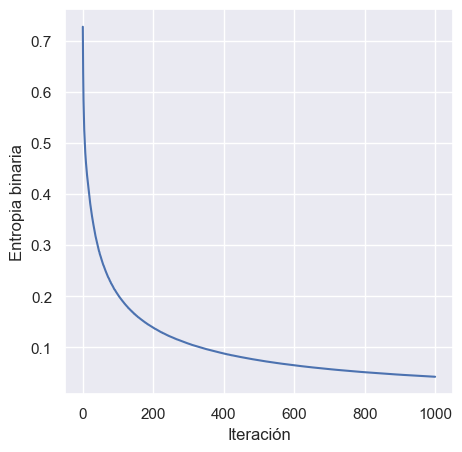

In [8]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(history.history['loss'])
ax.set_ylabel("Entropia binaria")
ax.set_xlabel("Iteración")
plt.show();

In [9]:
# Probemos a la red
test_1 = perceptron.predict(np.array([[0., 0, 1]]), verbose=0)
test_2 = perceptron.predict(np.array([[1., 1, 1]]), verbose=0)

print(f"Si la entrada es 0, 0, 1, la salida continua es: {test_1[0, 0]}")
print(f"Si la entrada es 1, 1, 1, la salida continua es: {test_2[0, 0]}")

test_1 = np.where(perceptron.predict(np.array([[0., 0, 1]]), verbose=0) > 0.5, 1, 0)
test_2 = np.where(perceptron.predict(np.array([[1., 1, 1]]), verbose=0) > 0.5, 1, 0)

print(f"\nSi la entrada es 0, 0, 1, la salida es: {test_1[0, 0]}")
print(f"Si la entrada es 1, 1, 1, la salida es: {test_2[0, 0]}")


Si la entrada es 0, 0, 1, la salida continua es: 0.0006497930153273046
Si la entrada es 1, 1, 1, la salida continua es: 0.8627138733863831

Si la entrada es 0, 0, 1, la salida es: 0
Si la entrada es 1, 1, 1, la salida es: 1


## Perceptron como regresión

Usando un perpectron, usemoslo en un ejemplo de regresión. Para ello vamos a convertir de Farenheit a Celsium. En la vida real, esto no tendria sentido, pero es a modo didactico.

In [10]:
# Primero definamos la funcion, que nos devuelva el valor de grado centigrado dado Farenheit
def far_to_celsium(farenheit):
    return (farenheit - 32) / 1.8

X_far = np.linspace(0, 220, 60000).reshape([-1, 1])
y_celsium = far_to_celsium(X_far)

print(X_far.dtype)
print(y_celsium.dtype)

# Data de validacion
X_val = np.random.choice(X_far.reshape(-1), size=int(len(X_far)*0.1)).reshape([-1, 1])
y_val = far_to_celsium(X_val)

float64
float64


In [11]:
# Creamos el perceptron para regresion
perceptron_reg = keras.Sequential()
perceptron_reg.add(keras.layers.Dense(1, input_shape=(1,), activation='linear'))

print(perceptron_reg.output_shape)

# Compilamos el modelo
# OBS con back-propagation tradicional no pude resolverlo.
perceptron_reg.compile(optimizer="adam", loss='mse', metrics=["mae"])

# Entrenamos the model
history = perceptron_reg.fit(X_far, y_celsium, validation_data=(X_val, y_val), epochs=600, batch_size=1000, verbose=0)

(None, 1)


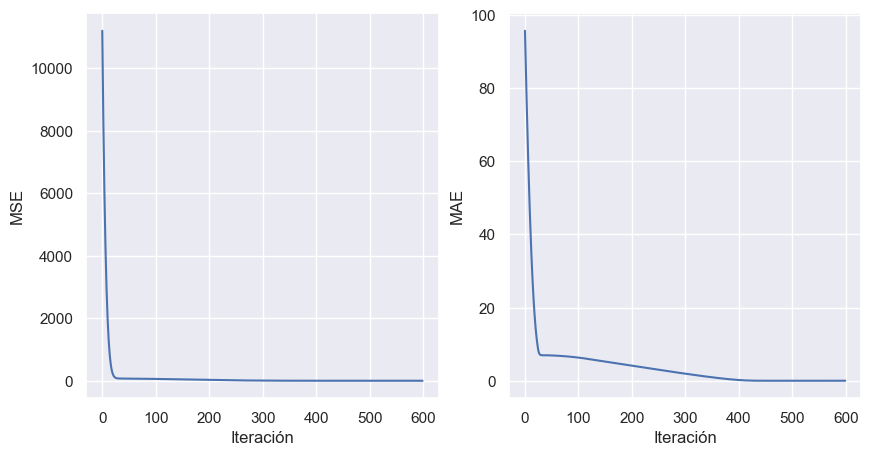

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].plot(history.history['loss'])
ax[1].plot(history.history['mae'])
ax[0].set_xlabel("Iteración")
ax[1].set_xlabel("Iteración")
ax[0].set_ylabel("MSE")
ax[1].set_ylabel("MAE")
plt.show();

In [13]:
# Probemos a la red
test_1 = perceptron_reg.predict(np.array([[73.4]]), verbose=0)
test_2 = perceptron_reg.predict(np.array([[104.]]), verbose=0)


print(f"Si tenemos 73.4F, en centigrado segun el modelo es: {test_1[0,0]:.1f}")
print(f"Si tenemos 73.4F, en centigrado de verdad es: {far_to_celsium(73.4):.1f}")
print(f"Si tenemos 104F, en centigrado segun el modelo es: {test_2[0,0]:.1f}")
print(f"Si tenemos 104F, en centigrado de verdad es: {far_to_celsium(104):.1f}")

Si tenemos 73.4F, en centigrado segun el modelo es: 23.0
Si tenemos 73.4F, en centigrado de verdad es: 23.0
Si tenemos 104F, en centigrado segun el modelo es: 40.0
Si tenemos 104F, en centigrado de verdad es: 40.0


## Red Feed-Foward en Heart

Usemos un caso real para probar el modelo, el dataset [**Heart**](https://archive.ics.uci.edu/dataset/45/heart+disease) que usamos anteriormente.

Recordemos que son mediciones de 1025 pacientes, con 13 atributos de variables fisiologicas. Además contamos con una columna de valores binarios llamada **target** que nos indica si el paciente tiene una enfermedad coronaria o no.

Para practicar el modelo SVM como clasificador (SVC), vamos a volver a usar el dataset [**Heart**](https://archive.ics.uci.edu/dataset/45/heart+disease), el cual mediciones de 1025 pacientes, con 13 atributos de variables fisiologicas. Además contamos con una columna de valores binarios llamada **target** que nos indica si el paciente tiene una enfermedad coronaria o no.

In [14]:
# Cargamos el dataset
df_heart = pd.read_csv("./Heart.csv")

# Hacemos variable dummy a las categoricas
categorical_features = ["cp", "restecg", "slope", "ca", "thal"]
df_heart_dummies = pd.get_dummies(data=df_heart, columns=categorical_features, drop_first=True)

X = df_heart_dummies.drop(columns='target').values
X = X.astype(float)
y = df_heart.iloc[:, -1].values
y = y.astype(float)

# Separemos el test de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Y el de validacion
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42)


In [15]:
# Creamos la red para la clasificacion con 22 entradas
feed_foward_clas = keras.Sequential()
# Escalamos las variables
feed_foward_clas.add(keras.layers.BatchNormalization(input_shape=(X_train.shape[1],)))
feed_foward_clas.add(keras.layers.Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
feed_foward_clas.add(keras.layers.Dense(1, activation='sigmoid'))

print(feed_foward_clas.output_shape)

# Compilamos el modelo
sgd = keras.optimizers.SGD(learning_rate=0.1)
feed_foward_clas.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['AUC'])

# Entrenamos the model
history = feed_foward_clas.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3000, 
                               batch_size=X_train.shape[0], verbose=0)

(None, 1)


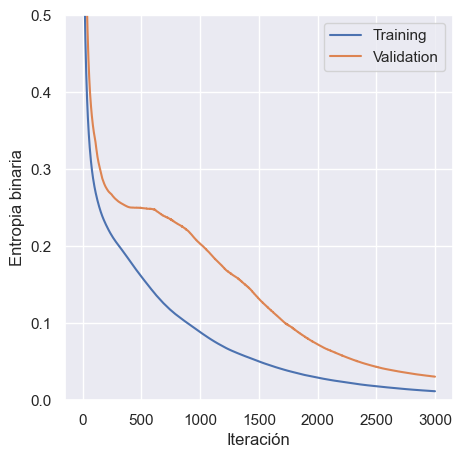

In [16]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(history.history["loss"], label="Training")
ax.plot(history.history["val_loss"], label="Validation")
ax.set_ylabel("Entropia binaria")
ax.set_xlabel("Iteración")
ax.legend()
ax.set_ylim([0, 0.5])
plt.show();

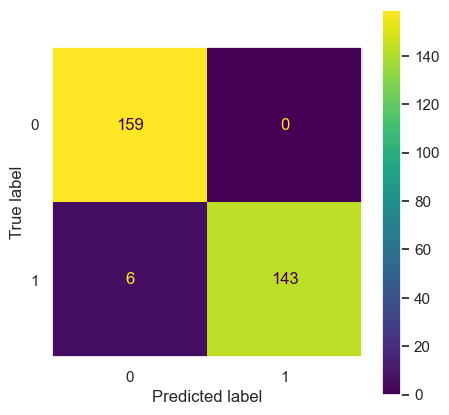

In [17]:
y_prob = feed_foward_clas.predict(X_test, verbose=0).reshape(-1)
y_pred = np.where(y_prob > 0.5, 1., 0.)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [18]:
print(f"El porcentaje de exactitud es de:{accuracy_score(y_test, y_pred)*100: .0f}%")
print(f"F1-score de testeo fue: {f1_score(y_test, y_pred)}")

El porcentaje de exactitud es de: 98%
F1-score de testeo fue: 0.9794520547945206


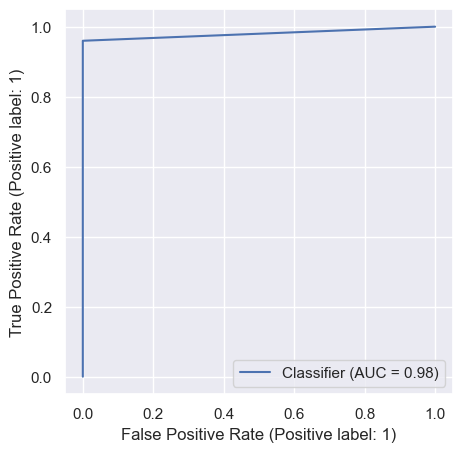

In [19]:
fig, ax = plt.subplots(figsize=(5,5))
svc_disp = RocCurveDisplay.from_predictions(y_test, y_pred, ax=ax)

plt.show();